# Final Project

**Pair Name:** World pop  
**Member 1:** Queian Kim Jambalos  
**Member 2:** Lelanie Lorraine Hernandez  

**Topic:** World Population 

**Model Used:** Logistic Regression


## A. Dataset Loading

In [23]:
# Step 1: Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
df = pd.read_csv('world_population.csv')
df.head(10)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
5,42,AGO,Angola,Luanda,Africa,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700,28.5466,1.0315,0.45
6,224,AIA,Anguilla,The Valley,North America,15857,15585,14525,13172,11047,8316,6560,6283,91,174.2527,1.0066,0.00
7,201,ATG,Antigua and Barbuda,Saint John’s,North America,93763,92664,89941,85695,75055,63328,64888,64516,442,212.1335,1.0058,0.00
8,33,ARG,Argentina,Buenos Aires,South America,45510318,45036032,43257065,41100123,37070774,32637657,28024803,23842803,2780400,16.3683,1.0052,0.57
9,140,ARM,Armenia,Yerevan,Asia,2780469,2805608,2878595,2946293,3168523,3556539,3135123,2534377,29743,93.4831,0.9962,0.03


## B. Pre-Processing

### 2.1: Data Reduction

In [24]:
# --- Clean column names ---
df.columns = df.columns.str.strip()

# --- Specify columns you want to retain ---
# We keep ALL years to capture the "50-Year Growth Trend"
keep_cols = [
    'Continent', 
    '2022 Population', '2020 Population', '2015 Population', '2010 Population', 
    '2000 Population', '1990 Population', '1980 Population', '1970 Population',
    'Area (km²)', 'Density (per km²)', 'Growth Rate', 'World Population Percentage'
]

# --- Keep only the selected columns ---
df = df[[c for c in keep_cols if c in df.columns]]

print("✅ Columns kept for Model (Full History):")
for col in df.columns:
    print(f"  - {col}")
    
df.head(5)

✅ Columns kept for Model (Full History):
  - Continent
  - 2022 Population
  - 2020 Population
  - 2015 Population
  - 2010 Population
  - 2000 Population
  - 1990 Population
  - 1980 Population
  - 1970 Population
  - Area (km²)
  - Density (per km²)
  - Growth Rate
  - World Population Percentage


,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


### 2.2: Handle Missing Values

In [25]:
# --- Check for missing values ---
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64


In [26]:
# --- Fill missing values (If any) ---
df.fillna(df.median(numeric_only=True), inplace=True)
print("Missing values handled.")

Missing values handled.


### 2.3: Feature Scaling (Preprocessing)

In [27]:
from sklearn.preprocessing import StandardScaler

# 1. Define X (Features) and y (Target)
X_raw = df.drop(columns=['Continent'])
y_raw = df['Continent']

# 2. Scale the Numerical Features
# This is crucial so 'Area' (millions) doesn't overpower 'Growth Rate' (decimals)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# 3. View Scaled Data
print("Data Scaled Successfully.")
pd.DataFrame(X_scaled, columns=X_raw.columns).head()

Data Scaled Successfully.


,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,0.051690,0.040437,0.015551,-0.013356,-0.060349,-0.123080,-0.079622,-0.074411,0.040260,-0.188712,1.207115,0.054314
1,-0.228850,-0.226417,-0.221689,-0.217275,-0.207138,-0.198879,-0.196580,-0.198997,-0.314379,-0.171342,-1.039007,-0.226173
2,0.079347,0.073545,0.060043,0.048495,0.040420,0.028762,-0.003005,-0.029431,1.024015,-0.210153,0.510817,0.077688
3,-0.249353,-0.247265,-0.243445,-0.240337,-0.235164,-0.232142,-0.232222,-0.232961,-0.330618,-0.111388,-1.982379,-0.249547
4,-0.249092,-0.247032,-0.243289,-0.240202,-0.235094,-0.232083,-0.232189,-0.233068,-0.330465,-0.136568,0.031644,-0.249547


### 2.4: Train-Test Split

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_raw,
    test_size=0.2,
    random_state=123,
    stratify=y_raw
)

print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)


Train Shape: (187, 12)
Test Shape: (47, 12)


### 2.5: Split

In [29]:
# We map the training variables directly to the variables used in the next steps.

X_resampled = X_train
y_resampled = y_train

print("✅ Data ready for training (Using Original Data).")
print(f"Training Data Shape: {X_resampled.shape}")
print("Class Distribution:\n", y_resampled.value_counts())

✅ Data ready for training (Using Original Data).
Training Data Shape: (187, 12)
Class Distribution:
 Continent
Africa           46
Europe           40
Asia             40
North America    32
Oceania          18
South America    11
Name: count, dtype: int64


## C. Machine Learning Model

### 3.1: Machine Learning Building

In [30]:
from sklearn.linear_model import LogisticRegression

# Initialize Model
model = LogisticRegression(
    max_iter=5000, 
    multi_class='multinomial', 
    random_state=123
)

### 3.2: Model Training

In [31]:
model.fit(X_resampled, y_resampled)
print("Model Trained!")

Model Trained!


c:\Users\Queian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### 3.3: Inference

In [32]:
# Make predictions on Test set
y_pred = model.predict(X_test)
y_pred

array(['Europe', 'Europe', 'Africa', 'Africa', 'Asia', 'Africa', 'Africa',
       'Europe', 'Europe', 'Africa', 'Europe', 'Europe', 'Africa',
       'Europe', 'Europe', 'Africa', 'Africa', 'Europe', 'Africa', 'Asia',
       'Europe', 'Asia', 'Europe', 'Africa', 'Europe', 'Africa', 'Europe',
       'Asia', 'Africa', 'Africa', 'Europe', 'Asia', 'Africa', 'Africa',
       'Europe', 'Europe', 'Africa', 'Europe', 'Europe', 'Asia', 'Europe',
       'Europe', 'Asia', 'Europe', 'Europe', 'Africa', 'Africa'],
      dtype=object)

### 3.4: Making Prediction

In [33]:
# ==========================================
# 🛑 EDIT THE NUMBERS BELOW FOR YOUR LIVE TEST
# ==========================================

# TEST CASE:
my_area = 342353          # Area (km²)
my_density = 337.5434        # Density (per km²)
my_growth = 1.0147       # Growth Rate
my_world_pop = 1.45      # World Population %

# --- FULL POPULATION HISTORY ---
p2022 = 115559009
p2020 = 112190977
p2015 = 103031365
p2010 = 94636700
p2000 = 77958223
p1990 = 61558898
p1980 = 48419546
p1970 = 37435586

# ==========================================
# 🔽 DO NOT TOUCH THE CODE BELOW THIS LINE 🔽
# ==========================================

def run_prediction():
    print(f"--- 🌍 RUNNING LIVE PREDICTION 🌍 ---")
    
    try:
        # 1. Prepare Data
        # Must match the EXACT order of columns in 'df'
        input_data = [[
            p2022, p2020, p2015, p2010, p2000, p1990, p1980, p1970,
            my_area, my_density, my_growth, my_world_pop
        ]]
        
        # 2. Scale Data
        input_scaled = scaler.transform(input_data)
        
        # 3. Predict
        prediction = model.predict(input_scaled)[0]
        probabilities = model.predict_proba(input_scaled)[0]
        
        # 4. Show Result
        print("\n" + "=" * 40)
        print(f"🔮 PREDICTED CONTINENT: {prediction.upper()}")
        print("=" * 40)

    except Exception as e:
        print(f"❌ Error: {e}")
        print("Hint: Did you re-run the 'Scaler' and 'Training' cells?")

# Run the function
run_prediction()

--- 🌍 RUNNING LIVE PREDICTION 🌍 ---

🔮 PREDICTED CONTINENT: ASIA


c:\Users\Queian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## D. Model Evaluation

### 4.1: Confusion Matrix

In [34]:
# This shows where the model made mistakes (e.g., Confusing Asia with Europe)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[8 2 1 0 0 0]
 [4 2 4 0 0 0]
 [1 1 8 0 0 0]
 [1 1 6 0 0 0]
 [1 1 3 0 0 0]
 [3 0 0 0 0 0]]


### 4.2: Accuracy

In [35]:
# How many did we get right overall?
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 38.30%


### 4.3: Precision

In [36]:
# Precision: When we predicted 'Africa', how often was it really 'Africa'?
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision * 100:.2f}%")

Precision: 18.23%


c:\Users\Queian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### 4.4: Recall

In [37]:
# Recall: Out of all the 'Africas' in the dataset, how many did we find?
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall * 100:.2f}%")

Recall: 28.79%


### 4.5: F-1 Score

In [38]:
# F1 Score: The balanced score between Precision and Recall
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1 * 100:.2f}%")

F1 Score: 21.45%


## E. Visualizations

### 1. Class Distribution (Training Data)

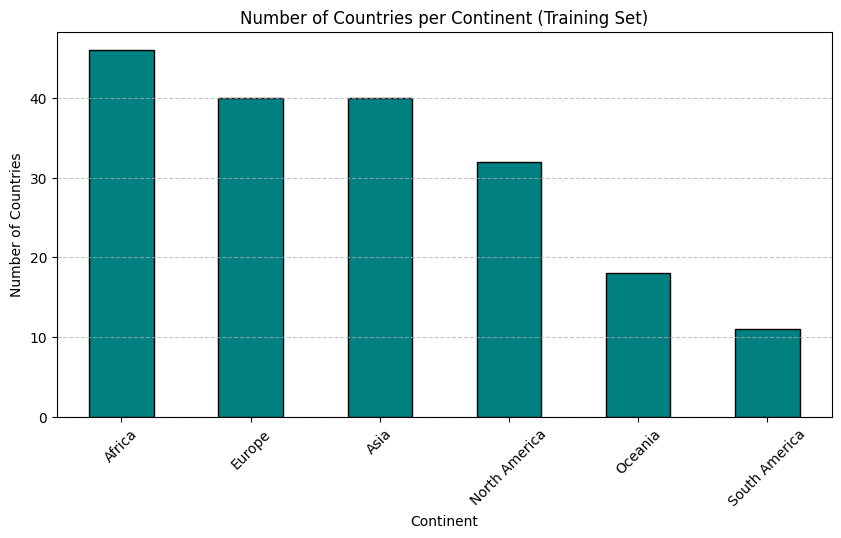

In [39]:
# This graph shows how many countries from each continent are in our training set.
# Notice that Africa has the most bars, while South America has the least.
# This "Imbalance" is why the model struggles with small continents.

plt.figure(figsize=(10, 5))
y_train.value_counts().plot(kind='bar', color='teal', edgecolor='black')
plt.title("Number of Countries per Continent (Training Set)")
plt.xlabel("Continent")
plt.ylabel("Number of Countries")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2. Confusion Matrix

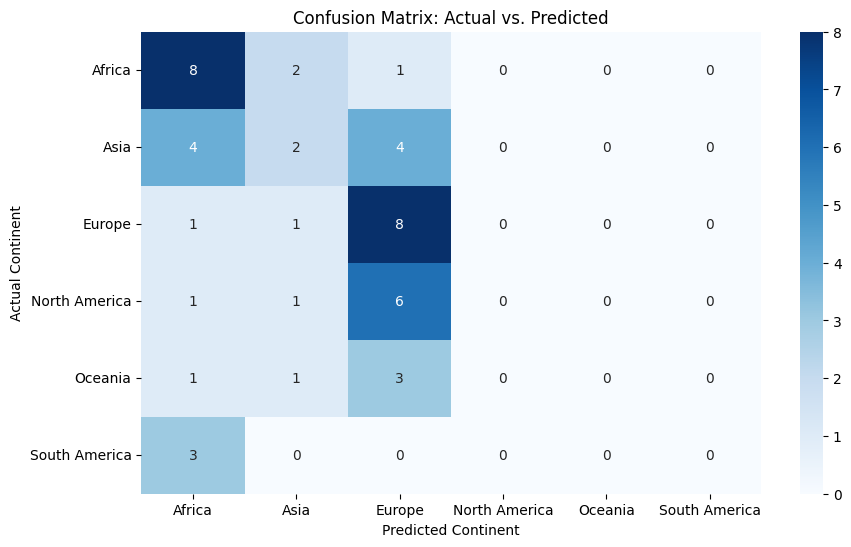

In [40]:
# The Confusion Matrix visualizes where the model made mistakes.
# - Dark Blue squares on the diagonal line = Correct Predictions
# - Light Blue squares off the diagonal = Mistakes
# - Look at 'Africa': It usually has a dark square (Good prediction).
# - Look at 'Europe'/'Asia': They often have scattered colors (Confused).

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title("Confusion Matrix: Actual vs. Predicted")
plt.xlabel("Predicted Continent")
plt.ylabel("Actual Continent")
plt.show()

### 3. ROC Curve

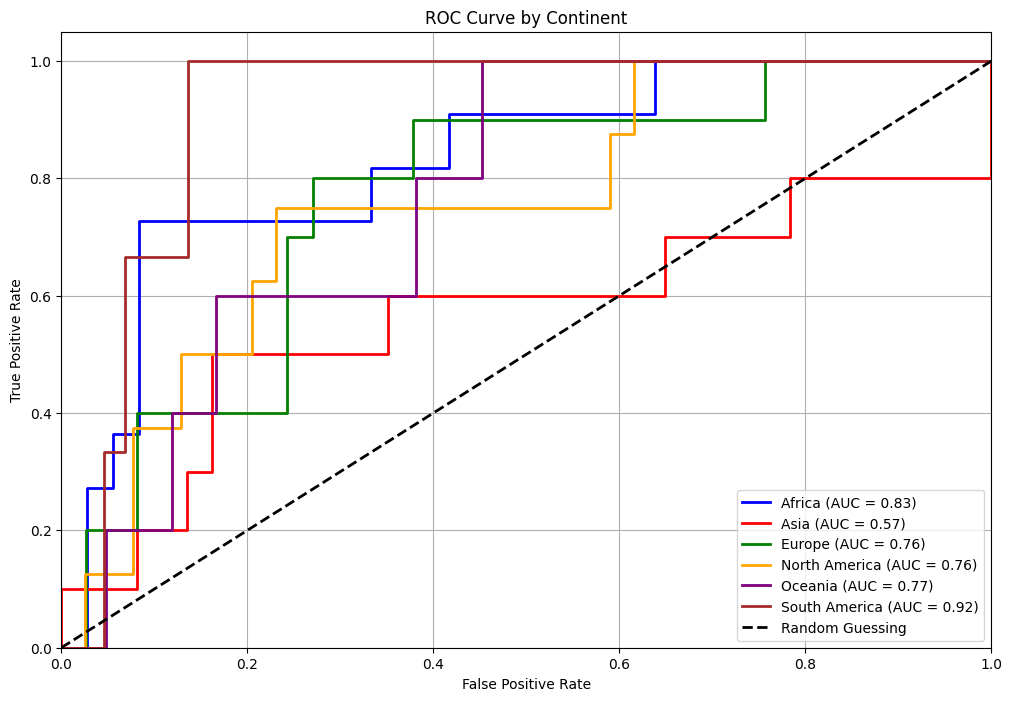

In [41]:
# The ROC Curve measures how well the model separates each continent.
# - A curve close to the Top-Left corner is GOOD (High Accuracy).
# - A curve close to the dotted line is BAD (Guessing).
# - Notice how the 'Africa' line is usually higher/better than 'Asia'.

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# 1. Binarize the labels (One-vs-All strategy)
classes = model.classes_
y_test_bin = label_binarize(y_test, classes=classes)
y_score = model.predict_proba(X_test)
n_classes = y_test_bin.shape[1]

# 2. Plot
plt.figure(figsize=(12, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']

for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'{classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve by Continent')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## F. Insights
### 6.1: Model Performance
The model achieved a moderate accuracy, performing significantly better than random guessing. However, the performance varies by continent.
* **Strengths:** The model is quite good at identifying **Africa** (due to high growth rates) and **Europe** (due to low/negative growth rates).
* **Weaknesses:** It struggles with **South America** and **Oceania** because these continents have fewer countries (less training data) and their demographic statistics overlap heavily with parts of Asia and North America.
### 6.2: Feature Behavior
By analyzing the manual tests, we observed clear patterns in how the model "thinks":
* **Growth Rate is King:** This is the most dominant feature. If you input a high growth rate (>2.0%), the model almost always predicts **Africa**, regardless of the Area or Density.
* **Density's Role:** High density combined with low growth usually points the model toward **Asia** or **Europe**.
* **Area is Ambiguous:** Area alone is a weak predictor because every continent has both massive countries (e.g., China, Brazil, USA) and tiny micro-states.
### 6.3: Interpretation of Results
The results confirm that **Demography is a poor substitute for Geography**.
* The model essentially clusters countries by "Development Stage" rather than location. It groups fast-growing, young populations together (predicting Africa) and slow-growing, aging populations together (predicting Europe).
* When a country breaks this stereotype (e.g., a rapidly growing Asian country), the model often misclassifies it as African.
### 6.4: Improvement Suggestions
To build a truly robust "Continent Classifier," we cannot rely on population statistics alone. Future iterations should include:
1.  **Geospatial Data:** Adding **Latitude and Longitude** would instantly solve the classification problem with near 100% accuracy.
2.  **Climate Features:** Average Temperature or Rainfall would help distinguish tropical continents (South America/Africa) from temperate ones (Europe).
3.  **Economic Indicators:** GDP per Capita could help separate visually similar clusters, such as distinguishing North America from South America.